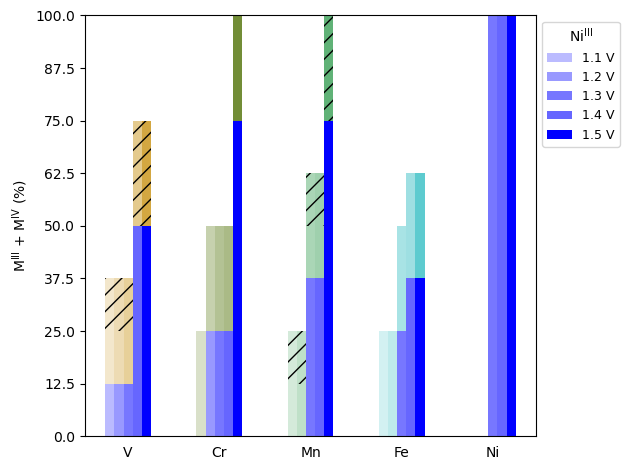

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

N = 5
a_Ni = (12.5, 0, 0, 0, 0)
b_Ni = (12.5, 25, 0, 0, 0)
c_Ni = (12.5, 25, 37.5, 25, 100)
d_Ni = (50, 25, 37.5, 37.5, 100)
e_Ni = (50, 75, 75, 37.5, 100)

a_M = (12.5, 25, 12.5, 25, 0)
b_M = (12.5, 25, 12.5, 25, 0)
c_M = (12.5, 25, 12.5, 25, 0)
d_M = (0, 25, 12.5, 25, 0)
e_M = (0, 25, 0, 25, 0)

def matrix_datas(datas):
    array = []
    for i in range(len(datas)):
        new_array = [0] * len(datas)
        new_array[i] = datas[i]
        array.append(new_array)
    return array

labels = ['V', 'Cr', 'Mn', 'Fe', 'Ni']

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

matrix_a_Ni = matrix_datas(a_Ni)
matrix_a_M = matrix_datas(a_M)
matrix_b_Ni = matrix_datas(b_Ni)
matrix_b_M = matrix_datas(b_M)
matrix_c_Ni = matrix_datas(c_Ni)
matrix_c_M = matrix_datas(c_M)
matrix_d_Ni = matrix_datas(d_Ni)
matrix_d_M = matrix_datas(d_M)
matrix_e_Ni = matrix_datas(e_Ni)
matrix_e_M = matrix_datas(e_M)

colors = ["#D3A741", "#728D36", "#60B277", "#5DCBCF", "#0000FF"]
colors_ni = ["#0000FF", "#0000FF", "#0000FF", "#0000FF", "#0000FF"]

for i in range(len(matrix_a_Ni)):
    ax.bar(x - 0.2, matrix_a_Ni[i], width, color=colors_ni[i] + '44')
    ax.bar(x - 0.1, matrix_b_Ni[i], width, color=colors_ni[i] + '66')
    ax.bar(x, matrix_c_Ni[i], width, color=colors_ni[i] + '88')
    ax.bar(x + 0.1, matrix_d_Ni[i], width, color=colors_ni[i] + '99')
    ax.bar(x + 0.2, matrix_e_Ni[i], width, color=colors_ni[i] + 'FF')

    # Ajouter un label sélectif seulement pour la dernière valeur de chaque série _M
    if i == len(matrix_a_Ni) - 1:
        ax.bar(x - 0.2, matrix_a_M[i], width, label='1.1 V', color=colors[i] + '44', bottom=matrix_a_Ni[i])
        ax.bar(x - 0.1, matrix_b_M[i], width, label='1.2 V', color=colors[i] + '66', bottom=matrix_b_Ni[i])
        ax.bar(x, matrix_c_M[i], width, label='1.3 V', color=colors[i] + '88', bottom=matrix_c_Ni[i])
        ax.bar(x + 0.1, matrix_d_M[i], width, label='1.4 V', color=colors[i] + '99', bottom=matrix_d_Ni[i])
        ax.bar(x + 0.2, matrix_e_M[i], width, label='1.5 V', color=colors[i] + 'FF', bottom=matrix_e_Ni[i])
    else:
        ax.bar(x - 0.2, matrix_a_M[i], width, color=colors[i] + '44', bottom=matrix_a_Ni[i])
        ax.bar(x - 0.1, matrix_b_M[i], width, color=colors[i] + '66', bottom=matrix_b_Ni[i])
        ax.bar(x, matrix_c_M[i], width, color=colors[i] + '88', bottom=matrix_c_Ni[i])
        ax.bar(x + 0.1, matrix_d_M[i], width, color=colors[i] + '99', bottom=matrix_d_Ni[i])
        ax.bar(x + 0.2, matrix_e_M[i], width, color=colors[i] + 'FF', bottom=matrix_e_Ni[i])

# Ajouter des valeurs supplémentaires au-dessus de toutes les barres pour "V" et "Mn"
extra_values_v = [12.5, 12.5, 12.5, 25, 25]  # valeurs supplémentaires pour chaque barre de "V"
extra_values_mn = [12.5, 12.5, 12.5, 12.5, 25]       # valeurs supplémentaires pour chaque barre de "Mn"

# Calcul des bases pour les barres supplémentaires
base_heights_v = [
    np.array(a_Ni) + np.array(a_M),
    np.array(b_Ni) + np.array(b_M),
    np.array(c_Ni) + np.array(c_M),
    np.array(d_Ni) + np.array(d_M),
    np.array(e_Ni) + np.array(e_M),
]

# Bases pour "Mn" (utilisant la position cumulative pour Mn uniquement)
base_heights_mn = [
    np.array(a_M),  # Utiliser les données pour "Mn"
    np.array(b_M),
    np.array(c_Ni) + np.array(c_M),
    np.array(d_Ni) + np.array(d_M),
    np.array(e_Ni) + np.array(e_M),
]

# Positions pour les barres
positions_v = [-0.2, -0.1, 0, 0.1, 0.2]
positions_mn = [-0.2, -0.1, 0, 0.1, 0.2]  # Aligner sur les mêmes positions que "Mn"
color_gradients = ['44', '66', '88', '99', 'FF']  # Opacités pour le dégradé

# Barres pour "V"
for pos, extra, base, opacity in zip(positions_v, extra_values_v, base_heights_v, color_gradients):
    if pos == 0.2:  # Ajouter la légende uniquement pour la dernière position
        ax.bar(x + pos, [extra] + [0] * (N - 1), width, color=colors[0] + opacity, hatch='//', bottom=base)#, label='V$\mathrm{^{IV}}$')
    else:
        ax.bar(x + pos, [extra] + [0] * (N - 1), width, color=colors[0] + opacity, hatch='//', bottom=base)

# Barres pour "Mn"
for pos, extra, base, opacity in zip(positions_mn, extra_values_mn, base_heights_mn, color_gradients):
    if pos == 0.1:  # Ajouter la légende uniquement pour une position spécifique
        ax.bar(x + pos, [0, 0, extra, 0, 0], width, color=colors[2] + opacity, hatch='//', bottom=base)#, label='Mn$\mathrm{^{IV}}$')
    else:
        ax.bar(x + pos, [0, 0, extra, 0, 0], width, color=colors[2] + opacity, hatch='//', bottom=base)

# Définir les ticks et les étiquettes de l'axe Y
y_ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]

# Configuration de l'axe et légende
ax.set_yticks(y_ticks)
ax.set_ylabel(r'M$\mathrm{^{III}}$ + M$\mathrm{^{IV}}$ (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', bottom=False)
ax.legend(title="Ni$\mathrm{^{III}}$", loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

fig.tight_layout()
plt.savefig('/Users/ltreps/Downloads/Ni3+_surface.pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()